In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# Read in the data

df = pd.read_csv('D:\Personal\Belajar\Data Analytic\movies.csv')

In [3]:
# look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [50]:
# looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing*100))

name-0.0%
rating-1.004173187271779%
genre-0.0%
year-0.0%
released-0.0%
score-0.03912363067292645%
votes-0.03912363067292645%
director-0.0%
writer-0.03912363067292645%
star-0.013041210224308816%
country-0.03912363067292645%
budget-0.0%
gross-0.0%
company-0.2217005738132499%
runtime-0.05216484089723526%
correctyear-0.02608242044861763%


In [10]:
# data types per columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
# change data type

df['budget'] = np.nan_to_num(df['budget']).astype('int64')
df['gross'] = np.nan_to_num(df['gross']).astype('int64')

In [16]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [51]:
# update year
df['released'] = df['released'].astype(str)
df['released'] = df['released'].fillna('1900')

In [55]:
print(df[df['released'].str.isnumeric()])

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, correctyear]
Index: []


In [58]:
df['correctyear'] = df['released'].str.extract(pat = '([0-9]{4})')

In [62]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
correctyear     object
dtype: object

In [68]:
df['correctyear'] = df['correctyear'].astype(int)

In [67]:
print(df[df['correctyear'].isnull()])

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, correctyear]
Index: []


In [66]:
df['correctyear'] = df['correctyear'].fillna('1900')

In [103]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [125]:
pd.set_option('display.max_rows', None)

In [104]:
# show unique values

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [73]:
# budget high correlation
# company high correlation


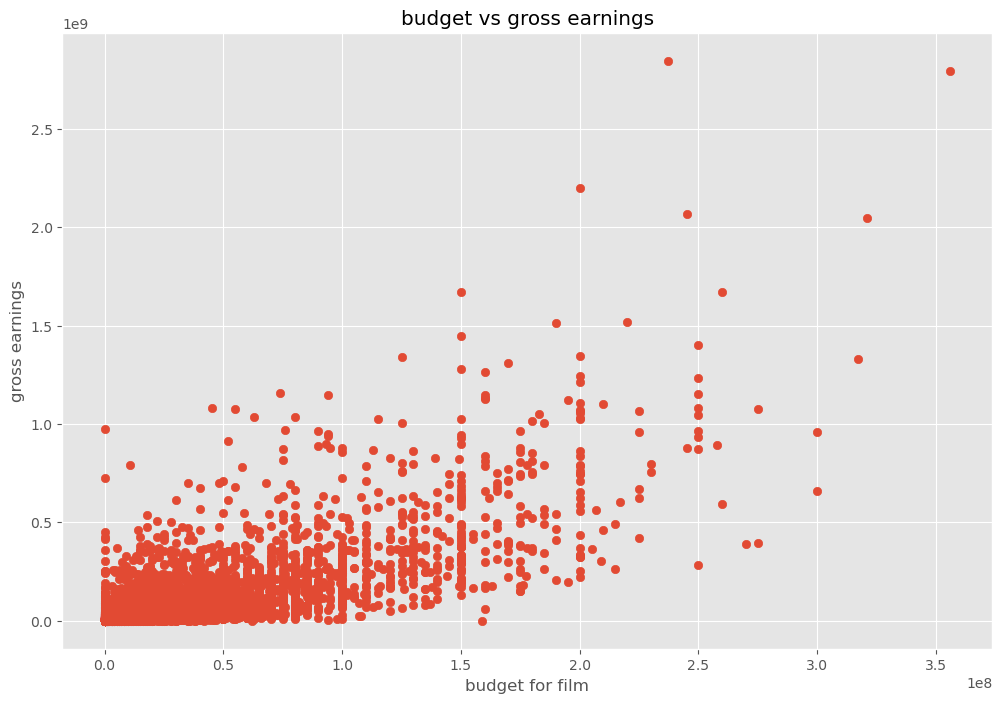

In [75]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('budget vs gross earnings')
plt.xlabel('budget for film')
plt.ylabel('gross earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

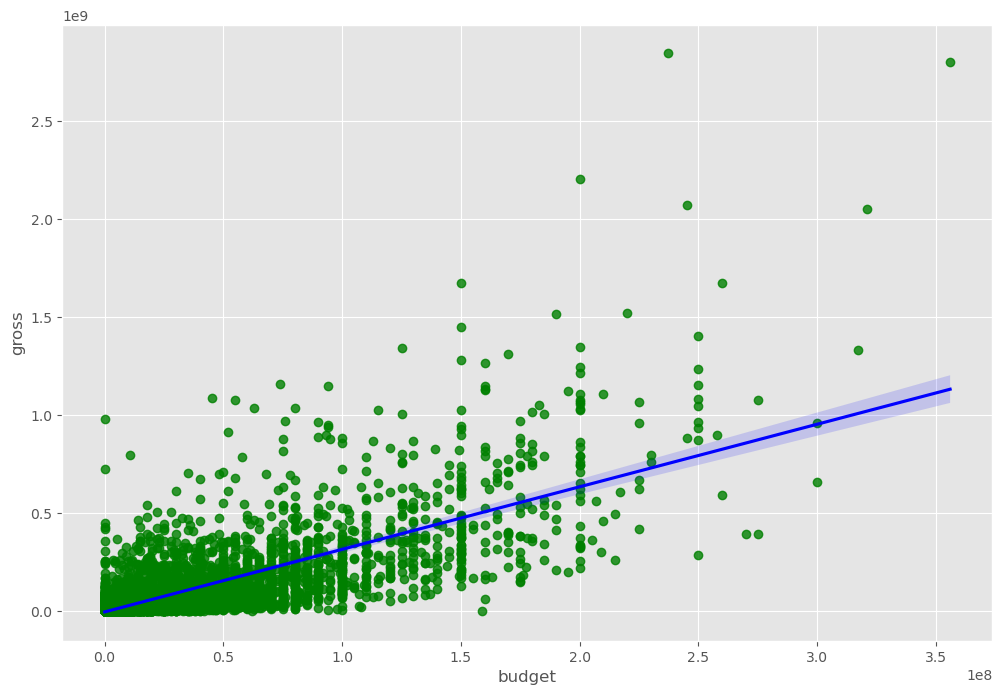

In [90]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, line_kws={"color":"blue"}, scatter_kws={"color":"green"})

In [98]:
# finding correlation

df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime,correctyear
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,0.984912
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.106540
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,0.215999
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,0.298457
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.253444
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
correctyear,0.984912,0.106540,0.215999,0.298457,0.253444,0.120636,1.000000


In [99]:
df.corr(numeric_only=True, method='pearson')

,year,score,votes,budget,gross,runtime,correctyear
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,0.984912
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.106540
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,0.215999
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,0.298457
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.253444
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
correctyear,0.984912,0.106540,0.215999,0.298457,0.253444,0.120636,1.000000


In [105]:
df.corr(numeric_only=True, method='kendall')

,year,score,votes,budget,gross,runtime,correctyear
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184,0.986854
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611,0.073699
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240,0.325364
budget,0.209304,-0.005194,0.439902,1.000000,0.541956,0.176016,0.200629
gross,0.216595,0.090626,0.560118,0.541956,1.000000,0.176912,0.206940
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000,0.096999
correctyear,0.986854,0.073699,0.325364,0.200629,0.206940,0.096999,1.000000


In [101]:
df.corr(numeric_only=True, method='spearman')

,year,score,votes,budget,gross,runtime,correctyear
year,1.000000,0.099045,0.469829,0.291152,0.314681,0.142977,0.996530
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857,0.107995
votes,0.469829,0.428138,1.000000,0.604627,0.752265,0.290159,0.462100
budget,0.291152,-0.007500,0.604627,1.000000,0.716816,0.246748,0.279081
gross,0.314681,0.132569,0.752265,0.716816,1.000000,0.256783,0.300953
runtime,0.142977,0.399857,0.290159,0.246748,0.256783,1.000000,0.142915
correctyear,0.996530,0.107995,0.462100,0.279081,0.300953,0.142915,1.000000


In [96]:
corr

,year,score,votes,budget,gross,runtime,correctyear
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,0.984912
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.106540
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,0.215999
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,0.298457
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.253444
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
correctyear,0.984912,0.106540,0.215999,0.298457,0.253444,0.120636,1.000000


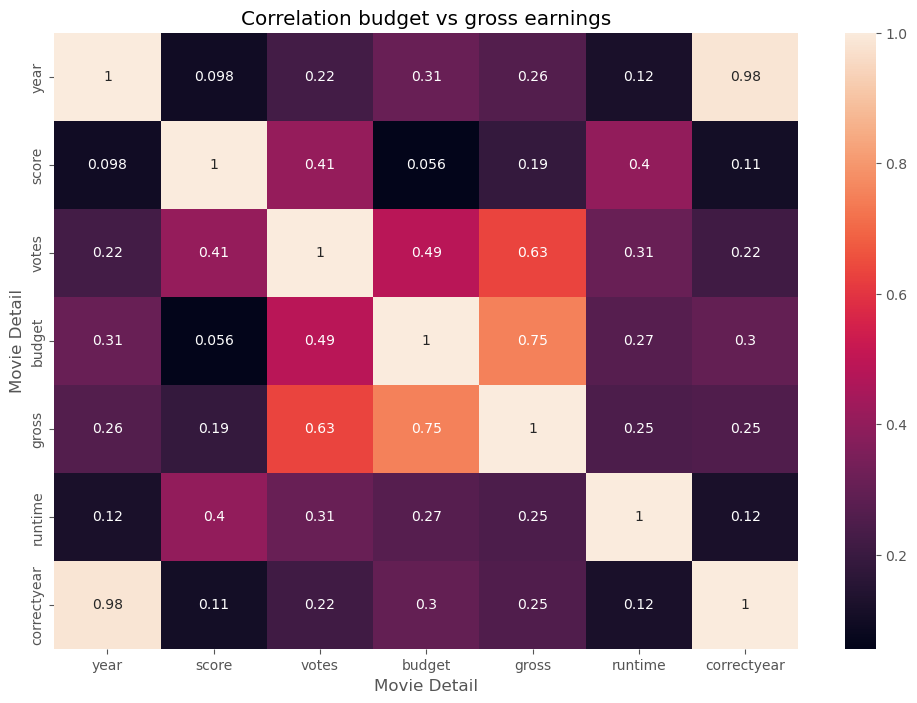

In [107]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation budget vs gross earnings')
plt.xlabel('Movie Detail')
plt.ylabel('Movie Detail')

plt.show()

In [111]:
# Company relation (non numeric correlation)



In [117]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1980
1,The Blue Lagoon,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1980
3,Airplane!,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1980
4,Caddyshack,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,0,-1,90.0,2020
7664,Dream Round,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,0,0,539,90.0,2020
7665,Saving Mbango,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,0,941,NaN,2020
7666,It's Just Us,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,0,-1,120.0,2020


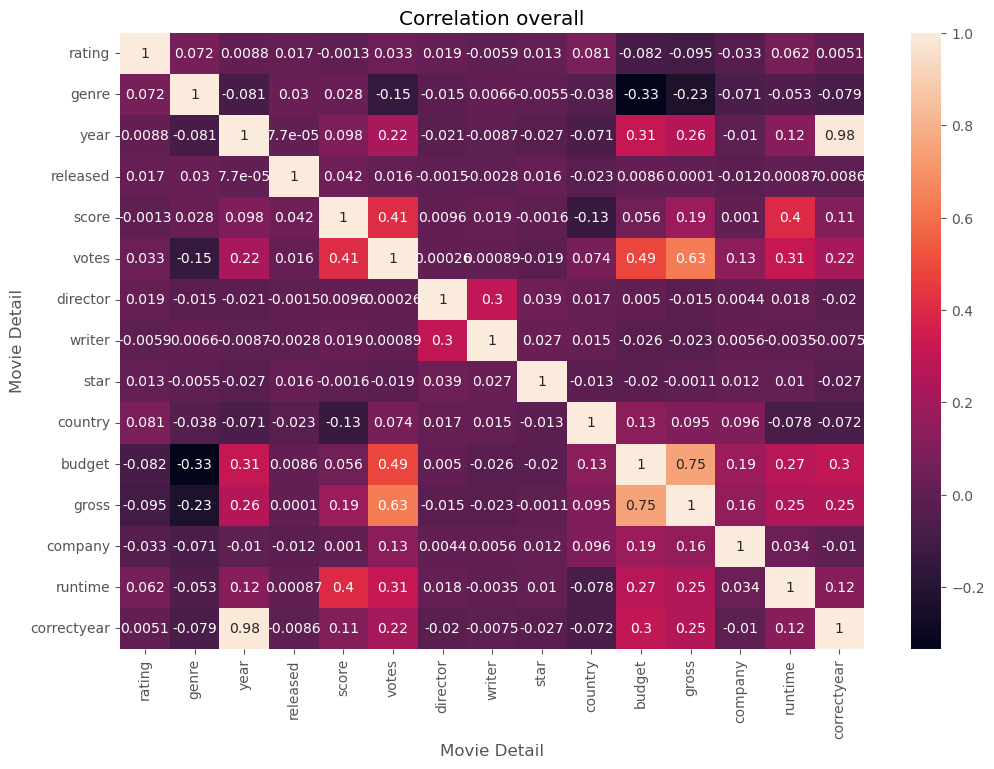

In [121]:
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation overall')
plt.xlabel('Movie Detail')
plt.ylabel('Movie Detail')

plt.show()

In [123]:
correlation_mat = df_numerized.corr(numeric_only=True, method='pearson')
corr_pairs = correlation_mat.unstack()
corr_pairs

rating       rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.017208
             score         -0.001314
                              ...   
correctyear  budget         0.298457
             gross          0.253444
             company       -0.010345
             runtime        0.120636
             correctyear    1.000000
Length: 225, dtype: float64

In [126]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145307
votes        genre         -0.145307
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.095450
rating       gross         -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
year         genre         -0.081261
genre        year          -0.081261
correctyear  genre         -0.078668
genre        correctyear   -0.078668
country      runtime       -0.078412
runtime      country       -0.078412
correctyear  country       -0.072151
country      correctyear   -0.072151
company      genre         -0.071067
genre        company       -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
             country       -0.037615
c

In [127]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.632834
gross        votes          0.632834
budget       gross          0.750157
gross        budget         0.750157
correctyear  year           0.984912
year         correctyear    0.984912
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64